# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
!pip3 install citipy

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

In [30]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [79]:
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_name = []


print(f"Beginning Data Retrieval")
print(f"-----------------------------")

for i,city in enumerate(cities): 
    try: 
        response = requests.get(query_url+city).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {i} for {city}")
    except:
        print("City not found. Skipping...")
    pass
    
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 for hermanus
Processing Record 1 for hilo
Processing Record 2 for punta arenas
Processing Record 3 for esperance
Processing Record 4 for albany
Processing Record 5 for anadyr
Processing Record 6 for havoysund
Processing Record 7 for saint-philippe
Processing Record 8 for rikitea
Processing Record 9 for cabo san lucas
Processing Record 10 for jamestown
Processing Record 11 for yinchuan
Processing Record 12 for butaritari
Processing Record 13 for batticaloa
Processing Record 14 for vaini
City not found. Skipping...
Processing Record 16 for atuona
Processing Record 17 for salalah
Processing Record 18 for chokurdakh
Processing Record 19 for mangrol
Processing Record 20 for arraial do cabo
City not found. Skipping...
Processing Record 22 for vila velha
Processing Record 23 for riyadh
Processing Record 24 for bambous virieux
Processing Record 25 for busselton
Processing Record 26 for mataura
Processing Record 27 for m

Processing Record 237 for orcopampa
Processing Record 238 for ancud
Processing Record 239 for kiama
Processing Record 240 for maku
Processing Record 241 for saint-augustin
Processing Record 242 for lancaster
Processing Record 243 for plettenberg bay
Processing Record 244 for agucadoura
Processing Record 245 for malm
Processing Record 246 for aras
Processing Record 247 for ozernovskiy
Processing Record 248 for nchelenge
Processing Record 249 for thinadhoo
Processing Record 250 for saint-joseph
Processing Record 251 for saint-pierre
Processing Record 252 for goure
Processing Record 253 for bengkulu
Processing Record 254 for sao joao da barra
Processing Record 255 for linxia
City not found. Skipping...
Processing Record 257 for vilyuysk
Processing Record 258 for ahipara
Processing Record 259 for saint george
Processing Record 260 for bandarbeyla
Processing Record 261 for kuching
Processing Record 262 for dromolaxia
Processing Record 263 for forio
Processing Record 264 for shingu
Processin

City not found. Skipping...
City not found. Skipping...
Processing Record 476 for turayf
Processing Record 477 for ashqelon
City not found. Skipping...
Processing Record 479 for asfi
Processing Record 480 for jaque
Processing Record 481 for paamiut
Processing Record 482 for amazar
Processing Record 483 for aksarka
Processing Record 484 for yuyao
City not found. Skipping...
Processing Record 486 for sergeyevka
Processing Record 487 for gewane
Processing Record 488 for cap-aux-meules
Processing Record 489 for gloucester
Processing Record 490 for raudeberg
Processing Record 491 for beringovskiy
Processing Record 492 for portales
Processing Record 493 for sao filipe
Processing Record 494 for kieta
Processing Record 495 for sambava
Processing Record 496 for mount gambier
City not found. Skipping...
Processing Record 498 for penzance
Processing Record 499 for togul
Processing Record 500 for bud
Processing Record 501 for kuminskiy
Processing Record 502 for buala
City not found. Skipping...
Pr

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,12,ZA,1611796843,92,-34.4187,19.2345,54.00,8.72
1,Hilo,90,US,1611796843,78,19.7297,-155.0900,73.40,4.61
2,Punta Arenas,90,CL,1611796843,87,-53.1500,-70.9167,42.80,9.22
3,Esperance,75,AU,1611796843,68,-33.8667,121.9000,68.00,9.22
4,Albany,99,US,1611796843,61,42.6001,-73.9662,28.99,1.01


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [308]:
weather_data = pd.DataFrame({
    "City":city_name,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
})

weather_data = weather_data[["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]]
weather_data["Lat"] = round(weather_data["Lat"],2)
weather_data["Lng"] = round(weather_data["Lng"],2)
weather_data.to_csv(output_data_file,encoding="utf-8", index=False)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,54.00,92,12,8.72,ZA,1611796843
1,Hilo,19.73,-155.09,73.40,78,90,4.61,US,1611796843
2,Punta Arenas,-53.15,-70.92,42.80,87,90,9.22,CL,1611796843
3,Esperance,-33.87,121.90,68.00,68,75,9.22,AU,1611796843
4,Albany,42.60,-73.97,28.99,61,99,1.01,US,1611796843


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


In [205]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.766531,23.013310,47.425982,74.769912,57.492035,8.269788,1.611797e+09
std,33.652656,91.635156,33.194857,18.561480,41.543390,5.865878,7.012783e+01
min,-54.800000,-175.200000,-51.880000,13.000000,0.000000,0.180000,1.611796e+09
25%,-9.080000,-58.650000,28.740000,66.000000,6.000000,3.440000,1.611797e+09
50%,25.520000,25.570000,57.990000,79.000000,75.000000,6.910000,1.611797e+09
75%,48.650000,106.270000,75.000000,88.000000,100.000000,11.500000,1.611797e+09
max,77.480000,179.320000,99.250000,100.000000,100.000000,35.790000,1.611797e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.

Int64Index([], dtype='int64')

In [315]:
df_test = weather_data[(weather_data["Humidity"] > 100)].index
df_test

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Not applicable, no citites have humidity greater than 100. 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

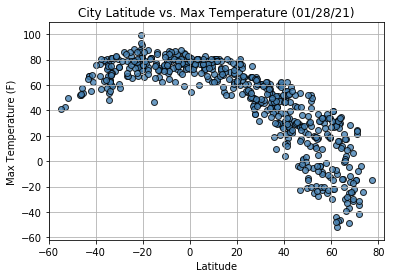

In [316]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"],facecolor="steelblue",marker="o",edgecolor = "black",alpha = .8)
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"), fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(min(weather_data["Lat"]) - 5,max(weather_data["Lat"]) + 5)
plt.ylim(min(weather_data["Max Temp"]) - 10,max(weather_data["Max Temp"]) + 10)
plt.grid()
plt.savefig("./Scatter Plots/City Latitude vs. Max Temperature - Scatter.png")
plt.show()

## Latitude vs. Humidity Plot

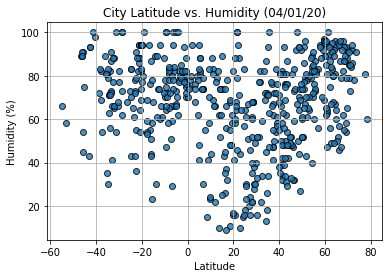

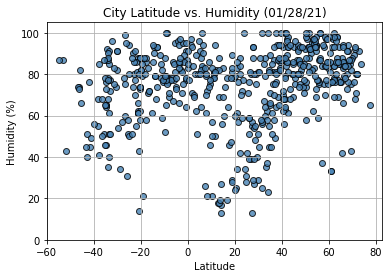

In [317]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"],facecolor="steelblue",marker="o",edgecolor = "black",alpha = .8)
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"), fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min(weather_data["Lat"]) - 5,max(weather_data["Lat"]) + 5)
plt.ylim(0,max(weather_data["Humidity"]) + 5)
plt.grid()
plt.savefig("./Scatter Plots/City Latitude vs. Humidity - Scatter.png")
plt.show()

## Latitude vs. Cloudiness Plot

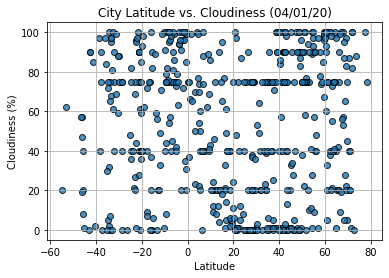

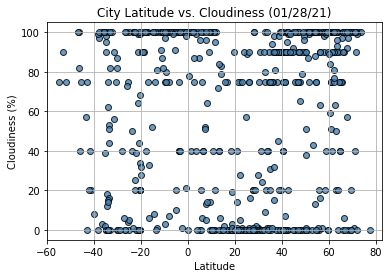

In [318]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"],facecolor="steelblue",marker="o",edgecolor = "black",alpha = .8)
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"), fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(min(weather_data["Lat"]) - 5,max(weather_data["Lat"]) + 5)
plt.ylim(min(weather_data["Cloudiness"]) - 5,max(weather_data["Cloudiness"]) + 5)
plt.grid()
plt.savefig("./Scatter Plots/City Latitude vs. Cloudiness - Scatter.png")
plt.show()

## Latitude vs. Wind Speed Plot

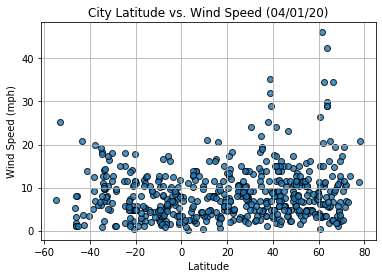

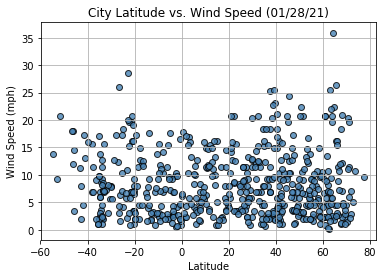

In [319]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"],facecolor="steelblue",marker="o",edgecolor = "black",alpha = .8)
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"), fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(min(weather_data["Lat"]) - 5,max(weather_data["Lat"]) + 5)
plt.ylim(min(weather_data["Wind Speed"]) - 2,max(weather_data["Wind Speed"]) + 2)
plt.grid()
plt.savefig("./Scatter Plots/City Latitude vs. Wind Speed - Scatter.png")
plt.show()

## Linear Regression

In [211]:
north_hem_df = weather_data.loc[weather_data["Lat"] >= 0, :]
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Hilo,19.73,-155.09,73.40,78,90,4.61,US,1611796843
4,Albany,42.60,-73.97,28.99,61,99,1.01,US,1611796843
5,Anadyr,64.75,177.48,12.20,85,75,22.37,RU,1611796515
6,Havøysund,71.00,24.66,21.20,68,40,11.50,NO,1611796515
9,Cabo San Lucas,22.89,-109.91,66.20,72,1,3.44,MX,1611796704


In [212]:
south_hem_df = weather_data.loc[weather_data["Lat"] < 0, :]
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,54.00,92,12,8.72,ZA,1611796843
2,Punta Arenas,-53.15,-70.92,42.80,87,90,9.22,CL,1611796843
3,Esperance,-33.87,121.90,68.00,68,75,9.22,AU,1611796843
7,Saint-Philippe,-21.36,55.77,77.00,61,0,6.91,RE,1611796844
8,Rikitea,-23.12,-134.97,79.72,74,100,10.98,PF,1611796844


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


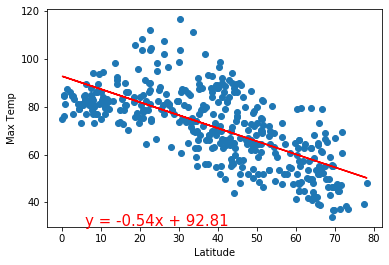

The r-value is: -0.8420538667299097


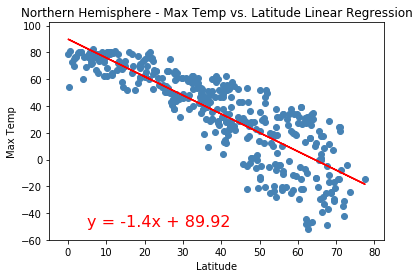

In [243]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df["Lat"],north_hem_df["Max Temp"])
print(f"The r-value is: {rvalue}")
plt.scatter(north_hem_df["Lat"],north_hem_df["Max Temp"],facecolor = "steelblue", marker = "o")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.xlim(min(north_hem_df["Lat"]) - 5,max(north_hem_df["Lat"]) + 5)
plt.ylim(min(north_hem_df["Max Temp"]) - 8,max(north_hem_df["Max Temp"]) + 20)
regress_values = north_hem_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_hem_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5,-50),fontsize=16,color="red")
plt.savefig("./Linear Regressions/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


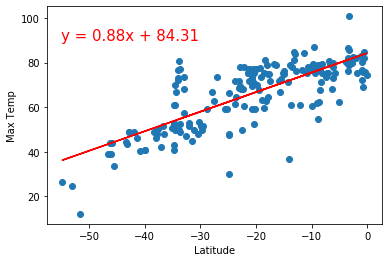

The r-value is: 0.5026151034875899


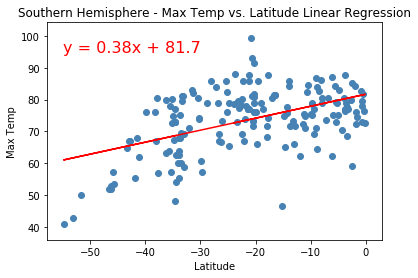

In [239]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df["Lat"],south_hem_df["Max Temp"])
print(f"The r-value is: {rvalue}")
plt.scatter(south_hem_df["Lat"],south_hem_df["Max Temp"],facecolor = "steelblue", marker = "o")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.xlim(min(south_hem_df["Lat"]) - 3,max(south_hem_df["Lat"]) + 3)
plt.ylim(min(south_hem_df["Max Temp"]) - 5,max(south_hem_df["Max Temp"]) + 5)
regress_values = south_hem_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_hem_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=16,color="red")
plt.savefig("./Linear Regressions/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


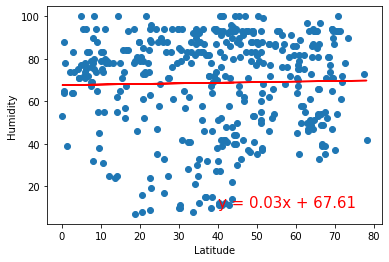

The r-value is: 0.3311878563084597


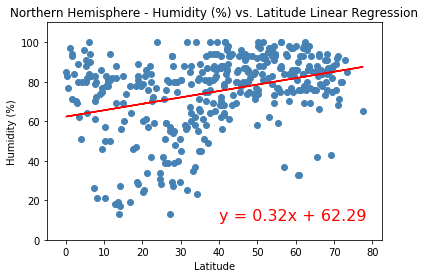

In [259]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df["Lat"],north_hem_df["Humidity"])
print(f"The r-value is: {rvalue}")
plt.scatter(north_hem_df["Lat"],north_hem_df["Humidity"],facecolor = "steelblue", marker = "o")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min(north_hem_df["Lat"]) - 5,max(north_hem_df["Lat"]) + 5)
plt.ylim(0,max(north_hem_df["Humidity"]) + 10)
regress_values = north_hem_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_hem_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=16,color="red")
plt.savefig("./Linear Regressions/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


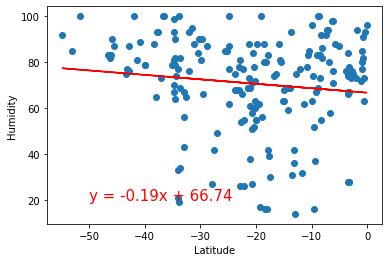

The r-value is: 0.33657006062420347


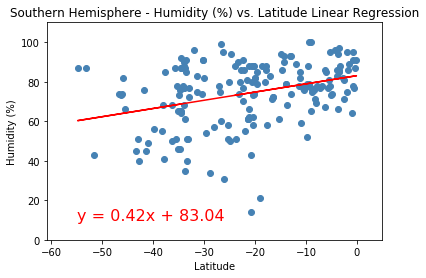

In [264]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df["Lat"],south_hem_df["Humidity"])
print(f"The r-value is: {rvalue}")
plt.scatter(south_hem_df["Lat"],south_hem_df["Humidity"],facecolor = "steelblue", marker = "o")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min(south_hem_df["Lat"]) - 6,max(south_hem_df["Lat"]) + 5)
plt.ylim(0,max(south_hem_df["Humidity"]) + 10)
regress_values = south_hem_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_hem_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=16,color="red")
plt.savefig("./Linear Regressions/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


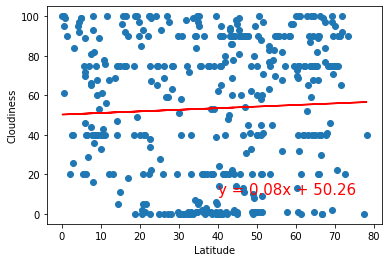

The r-value is: 0.2721582702011528


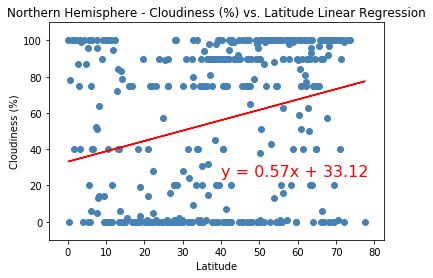

In [271]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df["Lat"],north_hem_df["Cloudiness"])
print(f"The r-value is: {rvalue}")
plt.scatter(north_hem_df["Lat"],north_hem_df["Cloudiness"],facecolor = "steelblue", marker = "o")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(min(north_hem_df["Lat"]) - 5,max(north_hem_df["Lat"]) + 5)
plt.ylim(min(north_hem_df["Cloudiness"])- 10,max(north_hem_df["Cloudiness"]) + 10)
regress_values = north_hem_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_hem_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=16,color="red")
plt.savefig("./Linear Regressions/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


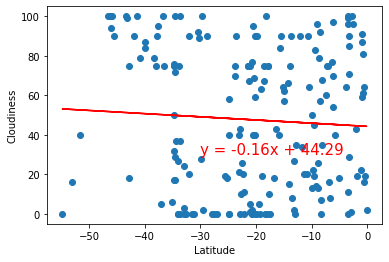

The r-value is: 0.2739682702293303


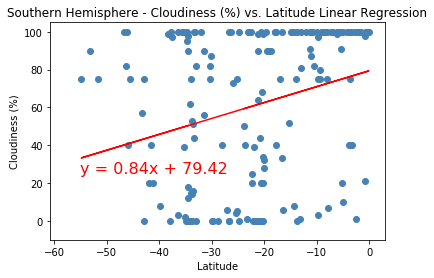

In [283]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df["Lat"],south_hem_df["Cloudiness"])
print(f"The r-value is: {rvalue}")
plt.scatter(south_hem_df["Lat"],south_hem_df["Cloudiness"],facecolor = "steelblue", marker = "o")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(min(south_hem_df["Lat"]) - 6,max(south_hem_df["Lat"]) + 3)
plt.ylim(min(south_hem_df["Cloudiness"])- 10,max(south_hem_df["Cloudiness"]) + 5)
regress_values = south_hem_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_hem_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=16,color="red")
plt.savefig("./Linear Regressions/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


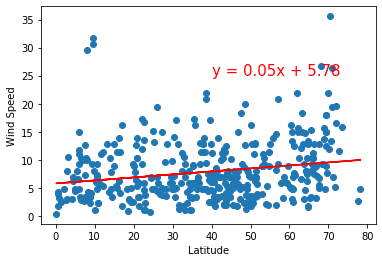

The r-value is: 0.0027673464285826797


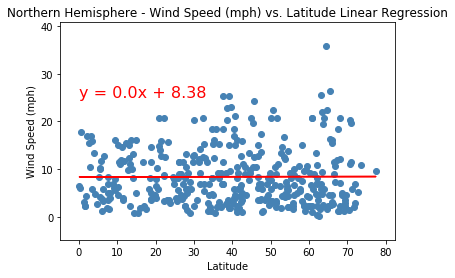

In [304]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df["Lat"],north_hem_df["Wind Speed"])
print(f"The r-value is: {rvalue}")
plt.scatter(north_hem_df["Lat"],north_hem_df["Wind Speed"],facecolor = "steelblue", marker = "o")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(min(north_hem_df["Lat"]) - 5,max(north_hem_df["Lat"]) + 5)
plt.ylim(min(north_hem_df["Wind Speed"])- 5,max(north_hem_df["Wind Speed"]) + 5)
regress_values = north_hem_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_hem_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=16,color="red")
plt.savefig("./Linear Regressions/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


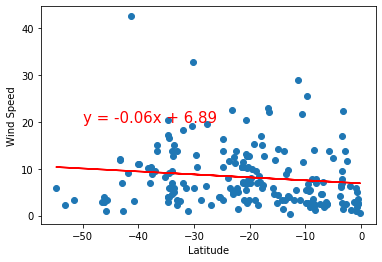

The r-value is: -0.22215973888695892


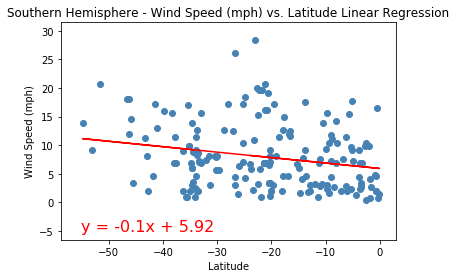

In [301]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df["Lat"],south_hem_df["Wind Speed"])
print(f"The r-value is: {rvalue}")
plt.scatter(south_hem_df["Lat"],south_hem_df["Wind Speed"],facecolor = "steelblue", marker = "o")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(min(south_hem_df["Lat"]) - 4,max(south_hem_df["Lat"]) + 3)
plt.ylim(min(south_hem_df["Wind Speed"])- 7,max(south_hem_df["Wind Speed"]) + 3)
regress_values = south_hem_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_hem_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,-5),fontsize=16,color="red")
plt.savefig("./Linear Regressions/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()